In [1]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = [
    "강아지는 귀엽다",
    "개는 사랑스럽다",
    "자동차는 빠르다"
]

embeddings = model.encode(sentences)

# 유사도 행렬 계산
sim_matrix = cosine_similarity(embeddings)

# 출력
print("유사도 행렬 (Cosine Similarity):")
print(sim_matrix)


유사도 행렬 (Cosine Similarity):
[[0.9999999  0.7187081  0.843595  ]
 [0.7187081  0.99999994 0.762161  ]
 [0.843595   0.762161   1.0000001 ]]


In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 실험 문장
sentences = [
    "오늘은 날씨가 정말 좋다.",
    "맑은 하늘이 기분을 상쾌하게 해준다.",
    "고양이는 낮잠을 자고 있다.",
    "나는 새로운 언어를 배우고 있다.",
    "자동차가 도로를 달리고 있다."
]

# 사용할 모델 리스트
model_names = [
    'sentence-transformers/all-MiniLM-L6-v2',
    'jhgan/ko-sroberta-multitask',
    'paraphrase-multilingual-MiniLM-L12-v2'

]

# 각 모델별 유사도 행렬 저장
for name in model_names:
    print(f"\n모델: {name}")
    model = SentenceTransformer(name)
    embeddings = model.encode(sentences)
    sim_matrix = cosine_similarity(embeddings)
    print(np.round(sim_matrix, 2))  # 보기 쉽게 소수점 2자리



모델: sentence-transformers/all-MiniLM-L6-v2
[[1.   0.51 0.49 0.61 0.57]
 [0.51 1.   0.59 0.72 0.54]
 [0.49 0.59 1.   0.67 0.76]
 [0.61 0.72 0.67 1.   0.72]
 [0.57 0.54 0.76 0.72 1.  ]]

모델: jhgan/ko-sroberta-multitask
[[ 1.    0.72  0.04  0.09  0.02]
 [ 0.72  1.    0.06  0.08 -0.04]
 [ 0.04  0.06  1.   -0.1  -0.03]
 [ 0.09  0.08 -0.1   1.   -0.03]
 [ 0.02 -0.04 -0.03 -0.03  1.  ]]

모델: paraphrase-multilingual-MiniLM-L12-v2


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 1.    0.67  0.    0.03  0.21]
 [ 0.67  1.    0.03  0.07  0.1 ]
 [ 0.    0.03  1.   -0.01  0.11]
 [ 0.03  0.07 -0.01  1.    0.03]
 [ 0.21  0.1   0.11  0.03  1.  ]]


In [8]:
from sentence_transformers import SentenceTransformer, util
import torch

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# 입력 단어들
words = ["기분", "맑다", "행복", "기쁨", "쾌활", "우울", "평온", "불쾌", "즐겁다", "상쾌"]
embeddings = model.encode(words, convert_to_tensor=True)

# 벡터 연산: 기분 + 맑다
target_vec = embeddings[0] + embeddings[1]

# 유사도 계산
cos_scores = util.pytorch_cos_sim(target_vec, embeddings)
cos_scores = cos_scores[0].tolist()

# 결과 정렬
result = sorted(zip(words, cos_scores), key=lambda x: x[1], reverse=True)

# 상위 유사도 결과 출력
for word, score in result[:5]:
    print(f"{word}: {score:.4f}")


기분: 0.9290
맑다: 0.8948
평온: 0.8605
쾌활: 0.8283
즐겁다: 0.8250


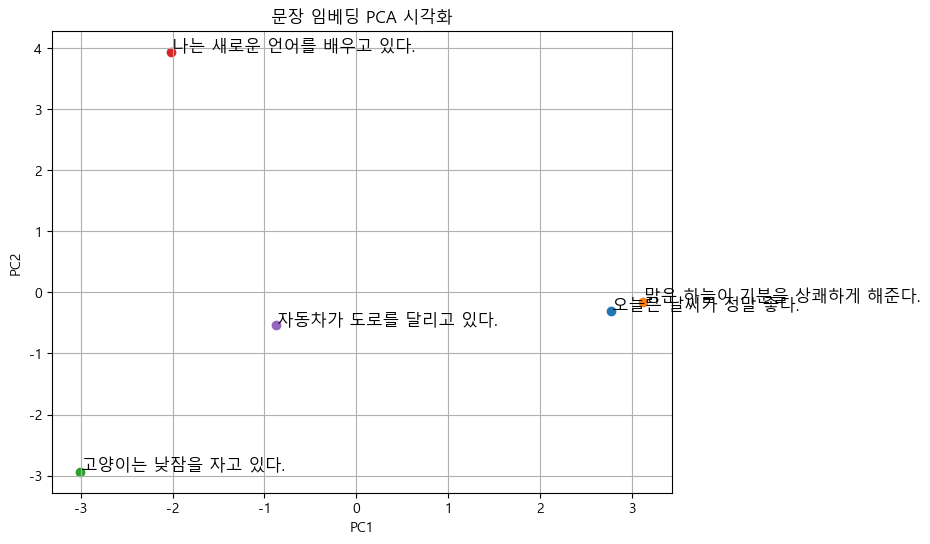

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 문장 목록
sentences = [
    "오늘은 날씨가 정말 좋다.",
    "맑은 하늘이 기분을 상쾌하게 해준다.",
    "고양이는 낮잠을 자고 있다.",
    "나는 새로운 언어를 배우고 있다.",
    "자동차가 도로를 달리고 있다."
]

# 모델 및 임베딩
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(sentences)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced):
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, sentences[i], fontsize=12)
plt.title("문장 임베딩 PCA 시각화")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


c:\Users\carpe\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


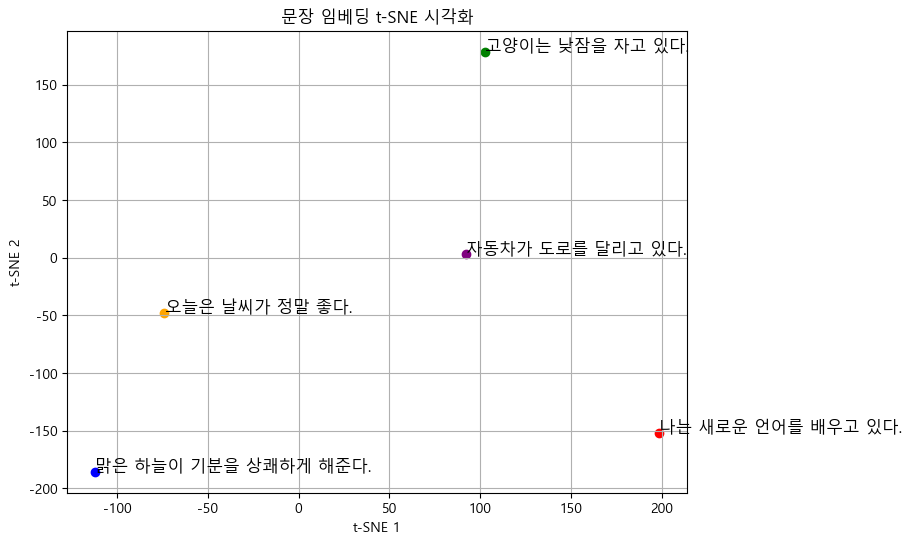

: 

In [ ]:
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 문장 리스트
sentences = [
    "오늘은 날씨가 정말 좋다.",
    "맑은 하늘이 기분을 상쾌하게 해준다.",
    "고양이는 낮잠을 자고 있다.",
    "나는 새로운 언어를 배우고 있다.",
    "자동차가 도로를 달리고 있다."
]

# 임베딩
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(sentences)

# t-SNE (주의: 랜덤성 있음, perplexity는 샘플 수에 맞게 낮게)
tsne = TSNE(n_components=2, perplexity=3, random_state=42, n_iter=1000)
reduced = tsne.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(8, 6))
colors = ['orange', 'blue', 'green', 'red', 'purple']
for i, (x, y) in enumerate(reduced):
    plt.scatter(x, y, color=colors[i])
    plt.text(x + 0.1, y + 0.1, sentences[i], fontsize=12)
plt.title("문장 임베딩 t-SNE 시각화")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()
